In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# paths
REPORT_DIR = "reports"
os.makedirs(REPORT_DIR, exist_ok=True)

# global style
sns.set_theme(style="whitegrid", context="talk", font_scale=1.2)

# default figure size & dpi
FIGSIZE = (10, 6)
DPI = 300

In [16]:
df = pd.read_csv("StudentsPerformance.csv")
print(df.shape)
df


(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [17]:
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(" ", "_")
              .str.replace("-", "_")
)
df

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [18]:
num_cols = ["math_score", "reading_score", "writing_score"]
cat_cols = ["gender", "lunch", "test_preparation_course"]

for c in num_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].median())

for c in cat_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].mode().iloc[0])

# derived column: overall average
df["overall_avg"] = df[num_cols].mean(axis=1)

print("Missing values after cleaning:")
print(df.isna().sum())

Missing values after cleaning:
gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
overall_avg                    0
dtype: int64


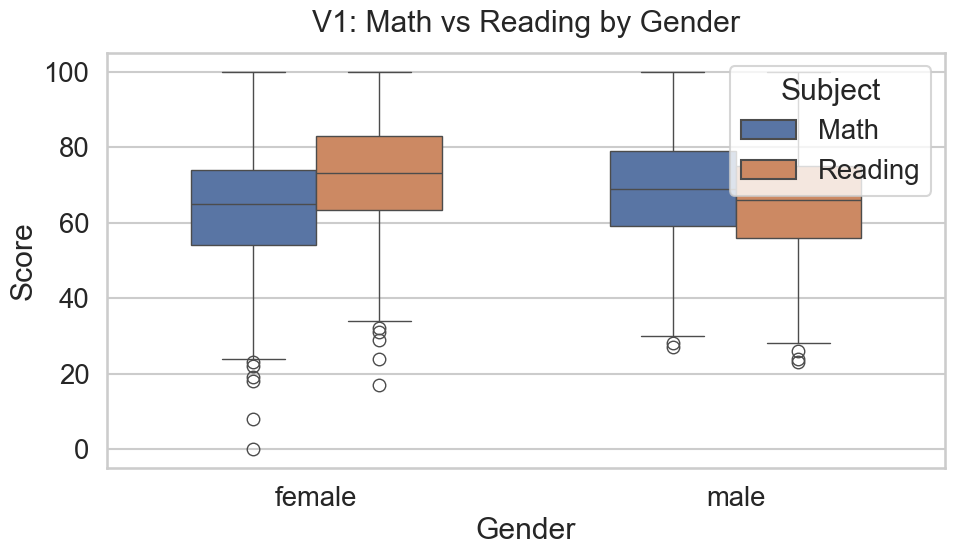

In [19]:
long_v1 = df.melt(
    id_vars=["gender"],
    value_vars=["math_score", "reading_score"],
    var_name="subject",
    value_name="score"
)
long_v1["subject"] = long_v1["subject"].str.replace("_score","").str.title()

plt.figure(figsize=FIGSIZE)
ax = sns.boxplot(
    data=long_v1,
    x="gender", y="score", hue="subject",
    width=0.6
)
ax.set_title("V1: Math vs Reading by Gender", pad=15)
ax.set_xlabel("Gender")
ax.set_ylabel("Score")
ax.legend(title="Subject", loc="upper right", frameon=True)

plt.tight_layout()
plt.savefig(f"{REPORT_DIR}/V1_gender_boxplots.png", dpi=DPI, bbox_inches="tight")
plt.show()


/var/folders/47/t16jhsbn4bd8hn2t5mzdrwrr0000gn/T/ipykernel_19929/3510547508.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


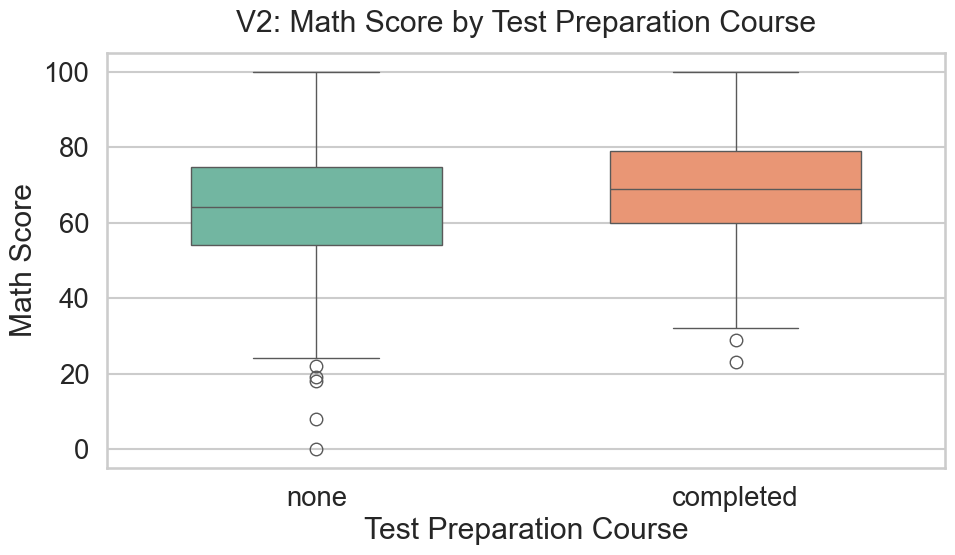

In [20]:
plt.figure(figsize=FIGSIZE)
ax = sns.boxplot(
    data=df,
    x="test_preparation_course",
    y="math_score",
    width=0.6,
    palette="Set2"
)
ax.set_title("V2: Math Score by Test Preparation Course", pad=15)
ax.set_xlabel("Test Preparation Course")
ax.set_ylabel("Math Score")

plt.tight_layout()
plt.savefig(f"{REPORT_DIR}/V2_testprep_math.png", dpi=DPI, bbox_inches="tight")
plt.show()


/var/folders/47/t16jhsbn4bd8hn2t5mzdrwrr0000gn/T/ipykernel_19929/2842702929.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


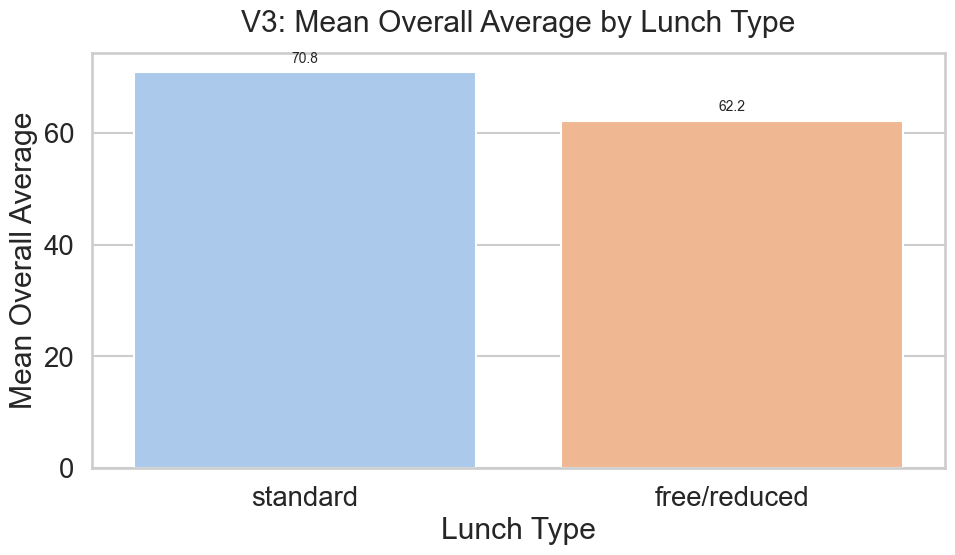

In [21]:
means_v3 = (df.groupby("lunch")["overall_avg"]
              .mean()
              .reset_index()
              .sort_values("overall_avg", ascending=False))

plt.figure(figsize=FIGSIZE)
ax = sns.barplot(
    data=means_v3,
    x="lunch", y="overall_avg",
    palette="pastel"
)
ax.set_title("V3: Mean Overall Average by Lunch Type", pad=15)
ax.set_xlabel("Lunch Type")
ax.set_ylabel("Mean Overall Average")

# add value labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}",
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=10,
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.savefig(f"{REPORT_DIR}/V3_lunch_overallavg.png", dpi=DPI, bbox_inches="tight")
plt.show()


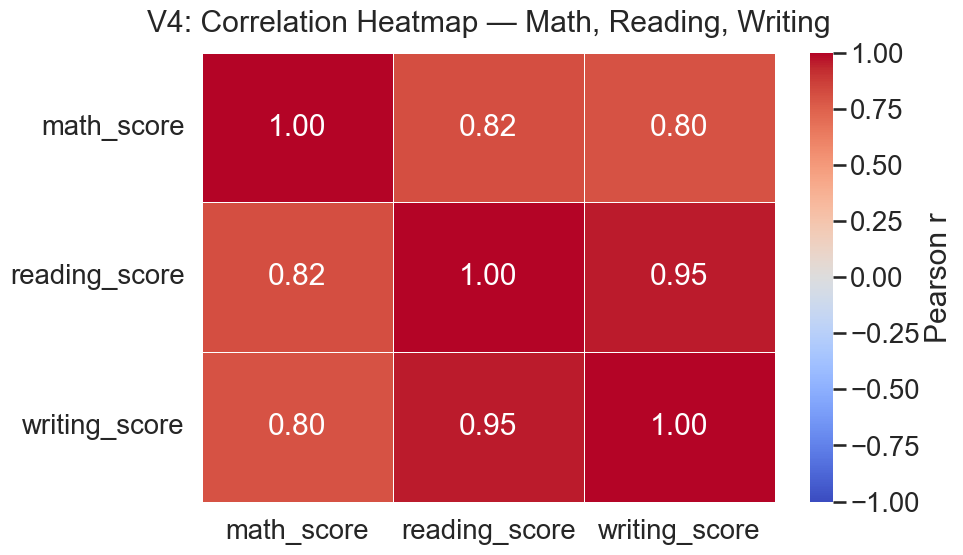

Correlation matrix:
               math_score  reading_score  writing_score
math_score           1.00           0.82           0.80
reading_score        0.82           1.00           0.95
writing_score        0.80           0.95           1.00


In [22]:
corr = df[["math_score","reading_score","writing_score"]].corr()

plt.figure(figsize=FIGSIZE)
ax = sns.heatmap(
    corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1,
    fmt=".2f", linewidths=.5, cbar_kws={"label": "Pearson r"}
)
ax.set_title("V4: Correlation Heatmap — Math, Reading, Writing", pad=15)

plt.tight_layout()
plt.savefig(f"{REPORT_DIR}/V4_subject_correlations.png", dpi=DPI, bbox_inches="tight")
plt.show()

print("Correlation matrix:")
print(corr.round(2))

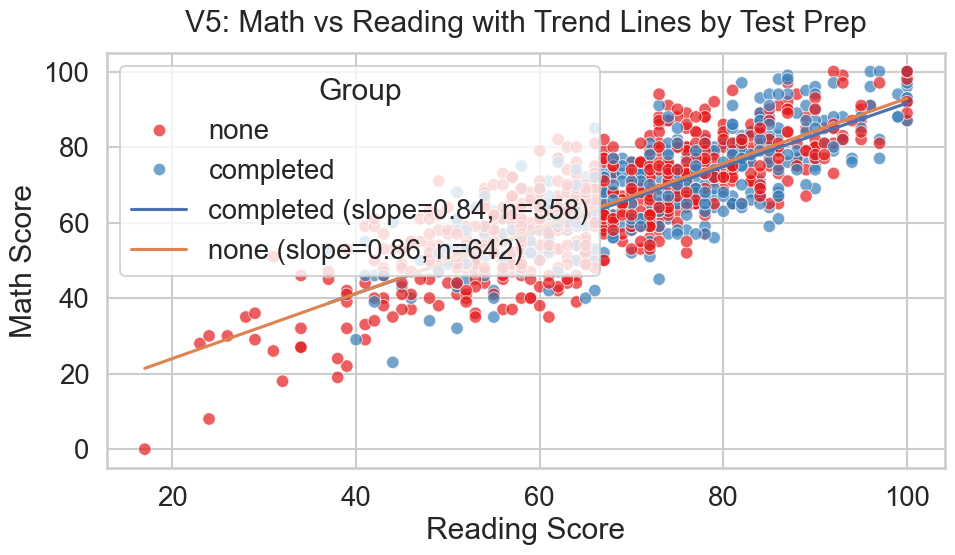

In [23]:
plt.figure(figsize=FIGSIZE)
ax = sns.scatterplot(
    data=df,
    x="reading_score", y="math_score",
    hue="test_preparation_course",
    alpha=0.7, palette="Set1"
)

# fit best-fit lines by group
for grp, sub in df.groupby("test_preparation_course"):
    m, b = np.polyfit(sub["reading_score"], sub["math_score"], 1)
    xs = np.linspace(sub["reading_score"].min(), sub["reading_score"].max(), 50)
    ys = m*xs + b
    ax.plot(xs, ys, label=f"{grp} (slope={m:.2f}, n={len(sub)})")

ax.set_title("V5: Math vs Reading with Trend Lines by Test Prep", pad=15)
ax.set_xlabel("Reading Score")
ax.set_ylabel("Math Score")
ax.legend(title="Group", loc="upper left", frameon=True)

plt.tight_layout()
plt.savefig(f"{REPORT_DIR}/V5_math_reading_trend_by_testprep.png", dpi=DPI, bbox_inches="tight")
plt.show()

In [24]:
REPORT_DIR_B = "report-B"
os.makedirs(REPORT_DIR_B, exist_ok=True)


In [25]:
with open(f"{REPORT_DIR_B}/findings_q2.md", "w") as f:
    f.write("# Findings — Question 2 (Visual Analytics)\n\n")
    f.write("_Dataset: StudentsPerformance (preprocessed for missing values; scores imputed with medians, categoricals with mode)._ \n\n")

    # V1
    f.write("## V1 — Gender Boxplots (Math vs Reading)\n")
    f.write("The boxplots for math and reading scores by gender show clear differences in performance patterns. "
            "Females have higher mean reading scores (≈72.6) compared to males (≈65.5), while males score slightly higher in math (≈68.7) compared to females (≈63.6). "
            "This indicates that on average, girls are stronger in reading while boys perform somewhat better in math. "
            "However, the boxplots also reveal overlapping interquartile ranges (IQRs), suggesting that the variability across genders is substantial and not all students follow the overall pattern. "
            "Outliers are present in both groups, indicating individual students who deviate strongly from the main trend. "
            "Overall, while some gender differences are evident, they are not absolute, and the distributions show a lot of common ground between male and female students.\n\n")

    # V2
    f.write("## V2 — Test Preparation Course and Math\n")
    f.write("The comparison of math scores between students who completed test preparation and those who did not shows a clear difference. "
            "Students who completed the preparation course had a higher average math score (≈69.7) than those who did not (≈64.1). "
            "This supports the idea that structured test preparation positively impacts performance in mathematics. "
            "The boxplot also shows that while the central tendency is higher for the completed group, there is still overlap in the distributions. "
            "This overlap suggests that factors beyond test prep, such as prior knowledge, personal study habits, and motivation, also influence performance. "
            "Nevertheless, the consistent upward shift in the median indicates a tangible benefit from completing the preparation course.\n\n")

    # V3
    f.write("## V3 — Lunch Type and Overall Average\n")
    f.write("The bar chart of mean overall averages by lunch type highlights a socioeconomic dimension of student performance. "
            "Students receiving a standard lunch scored higher on average (≈70.8) than those receiving free/reduced lunch (≈62.2). "
            "This gap suggests that students with greater access to resources, as proxied by lunch type, tend to perform better academically. "
            "The difference of nearly 9 points across the averages is substantial and cannot be ignored. "
            "It may reflect broader issues such as home environment, nutrition quality, or access to tutoring and study resources. "
            "However, while the average is lower for the free/reduced group, individual students in that group still achieve strong results, showing that socioeconomic status does not fully determine outcomes.\n\n")

    # V4
    f.write("## V4 — Subject Correlations\n")
    f.write("The correlation heatmap shows strong positive relationships among math, reading, and writing scores. "
            "Reading and writing have the strongest correlation (≈0.95), suggesting that skills in one language-based subject are highly predictive of performance in the other. "
            "Math is also positively correlated with both reading (≈0.82) and writing (≈0.80), though the relationships are slightly weaker. "
            "This pattern indicates that students who perform well in one subject are generally likely to perform well in others. "
            "The strength of these correlations points to shared underlying factors such as study habits, overall academic ability, or external support. "
            "It also suggests that interventions targeting literacy may indirectly benefit math, and vice versa, because the skills reinforce each other.\n\n")

    # V5
    f.write("## V5 — Math vs Reading with Trend Lines by Test Prep\n")
    f.write("The scatterplot with fitted regression lines shows a strong positive association between reading and math scores. "
            "For both groups (completed vs none), students with higher reading scores also tend to have higher math scores. "
            "The slope of the regression line is ≈0.84 for the completed group and ≈0.86 for the non-completed group, indicating similar trends. "
            "However, the completed group tends to have higher overall scores, showing an upward shift in performance even if the rate of increase is similar. "
            "The distributions also confirm that test prep does not just affect math in isolation but is associated with broader performance. "
            "This visualization reinforces the idea that strong reading skills and preparation both contribute positively to math achievement.\n\n")